In [2]:
%matplotlib inline
from modsim import *

earth = Condition(thickness = 14140,
                     surface_area = 5.099686589e+14,
                     density = 5510)
earth.radius = sqrt(earth.surface_area / (8 * np.pi))
earth.volume1 = earth.thickness * earth.radius** 2 * np.pi
earth.mass = earth.volume1 * earth.density
print(earth.radius)



baseball = Condition(x = earth.radius / 2.5, 
                      y = (earth.thickness/2) + 1,
                      ay = 9.8,
                      G = 6.67e-11,
                      mass = 145e-3,
                      diameter = 73e-4,
                      rho = 1,
                      C_d = 0.3,
                      angle = 60,
                      velocity = 120,
                      duration = 300)

def make_system(condition):
    """Make a system object.
    
    condition: Condition object with angle, velocity, x, y,
               diameter, duration, g, mass, rho, and C_d
               
    returns: System object
    """
    unpack(condition)
    
    # convert angle to degrees
    theta = np.deg2rad(angle)
    
    # compute x and y components of velocity
    vx, vy = pol2cart(theta, velocity)
    
    # make the initial state
    init = State(x=x, y=y, vx=vx, vy=vy)
    
    # compute area from diameter
    area = np.pi * (diameter/2)**2
    
    # compute timestamps
    ts = linspace(0, duration, 101)
    
    return System(init=init, G=G, mass=mass, 
                  area=area, rho=rho, C_d=C_d, ts=ts)

def slope_func(state, t, system):
    x, y, vx, vy = state
    unpack(system)
    p = Vector(x, y)
    v = Vector(vx, vy)
    f_grav = p.hat() * (-G * earth.mass * mass / (p.mag**2))
    f_drag = -rho * v.mag * v * C_d * area / 2
    
    #print(f_grav)
    #print(f_grav.mag)
    
    a_grav = f_grav / mass
    a_drag = f_drag / mass
    a_y= Vector(0, -ay)
    
    a = a_grav + a_y
    #a = a_grav + a_drag + a_y


    return vx, vy, a.x, a.y

def find_landing(system):
    counter = 0
    for height in system.results.y:
        if (height < (earth.thickness / 2)):
            #print(system.results.y.index[counter])
            return system.results.y.index[counter]
        counter += 1
        
def calc_dist(system):
    time = find_landing(system)
    dist = abs(system.init.x - system.results.x[ground_time])
    return dist



4504554.16456


In [3]:
system = make_system(baseball)
system.init

,value
x,1.801822e+06
y,7.071000e+03
vx,6.000000e+01
vy,1.039230e+02


In [4]:
system = make_system(baseball)
run_odeint(system, slope_func)
find_landing(system)

24.0

C:\ProgramData\Miniconda3\lib\site-packages\scipy\integrate\odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


dist is 4.49074241666
dist is 1270.96152195
dist is 1397.71150539
dist is 1421.20086749
dist is 1429.42430806


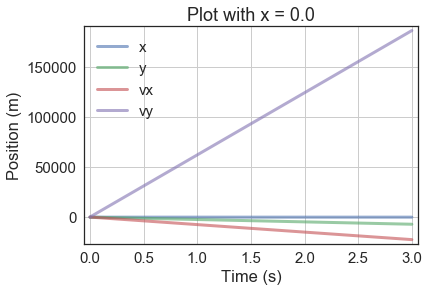

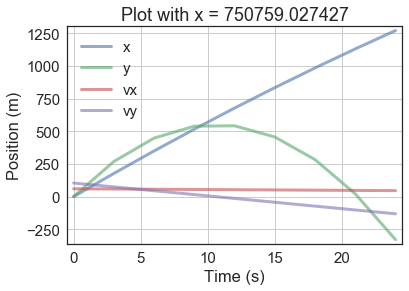

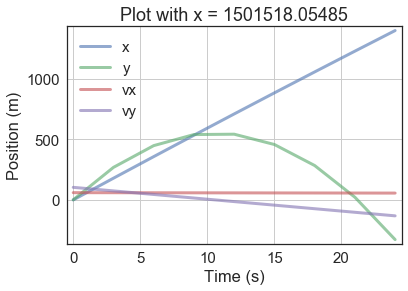

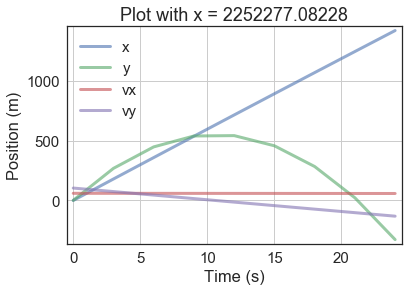

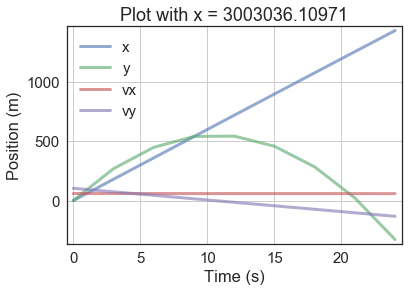

In [5]:
for x in linspace(0, earth.radius/1.5, 5):
    
    baseball.x = x
    system = make_system(baseball)
    slope_func(system.init, 0, system)


    run_odeint(system, slope_func)

    xs = system.results.x  - (x)
    ys = system.results.y - (earth.thickness / 2)

    xv = system.results.vx
    yv = system.results.vy

    ground_time = find_landing(system)

    newfig()
    plot(xs[:ground_time], label='x')
    plot(ys[:ground_time], label='y')
    plot(xv[:ground_time], label='vx')
    plot(yv[:ground_time], label='vy')
    plt.grid()
    decorate(title='Plot with x = ' + str(x),
                xlabel='Time (s)',
             ylabel='Position (m)',)
    print("dist is " + str(calc_dist(system)))



In [ ]:
baseball.x = 240000
system = make_system(baseball)
slope_func(system.init, 0, system)


run_odeint(system, slope_func)

xs = system.results.x  - (x)
ys = system.results.y - (earth.thickness / 2)

xv = system.results.vx
yv = system.results.vy

ground_time = find_landing(system)

newfig()

plot(xs[:ground_time], label='x')
plot(ys[:ground_time], label='y')
plot(xv[:ground_time], label='vx')
plot(yv[:ground_time], label='vy')

plt.grid()
decorate(title='Plot with x = ' + str(x),
            xlabel='Time (s)',
         ylabel='Position (m)',)
print("dist is " + str(calc_dist(system)))

In [ ]:
baseball.x = 240000
system = make_system(baseball)
slope_func(system.init, 0, system)


run_odeint(system, slope_func)

xs = system.results.x  - (x)
ys = system.results.y - (earth.thickness / 2)

xv = system.results.vx
yv = system.results.vy

ground_time = find_landing(system)
xx = xs[:ground_time]
yy = ys[:ground_time]

ts = xs.index
dts = np.diff(ts)
dts = np.append(dts, 0)

# decorate the plot
newfig()
decorate(xlabel='x position (m)',
         ylabel='y position (m)',
         xlim=[xx.min(), xx.max()],
         ylim=[yy.min(), yy.max()],
         legend=False)

# loop through the values
for x, y, dt in zip(xx, yy, dts):
    plot(x, y, 'bo', update=True)
    sleep(200)

plt.grid()
#decorate(title='Plot with x = ' + str(x),
#            xlabel='Time (s)',
#         ylabel='Position (m)',)
print("dist is " + str(calc_dist(system)))

In [11]:
for i in range(1):
    newfig()
    for x in linspace(0, 250000, 200):
        baseball.x = x
        system = make_system(baseball)

        run_odeint(system, slope_func)

        ground_time = find_landing(system)
        plt.grid()
        plot(x, calc_dist(system), 'b-')
        decorate(
                    xlabel='initial distance from pole',
                 ylabel='final distance to initial')

C:\ProgramData\Miniconda3\lib\site-packages\scipy\integrate\odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
